# Scipy

In [16]:
%config InlineBackend.figure_format = 'svg'
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as la

## Use LU decomposition to solve Ax=b

Create a random $5 \times 5$ matrix

In [17]:
n = 5
A = np.random.rand(n,n)
print(A)

[[0.75058103 0.61707649 0.76947466 0.56309116 0.18121943]
 [0.88125796 0.86743178 0.74042124 0.51219325 0.16934948]
 [0.97917718 0.00221712 0.0970249  0.55433613 0.06422769]
 [0.5489304  0.53640387 0.9549074  0.43997482 0.82596508]
 [0.43132613 0.87856897 0.49134442 0.50813387 0.99428191]]


Compute its LU factorization (see also [scipy.linalg.lu](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.lu.html))

In [18]:
lu,piv = la.lu_factor(A)

Create a right hand side vector

In [19]:
b = np.random.rand(n)

Solve $A x = b$

In [20]:
x = la.lu_solve((lu,piv),b)
print(x)

[ 1.05984119  0.15803198 -0.80802599 -0.05152355  0.79680993]


Check that x solves the problem

In [21]:
print(A@x-b)

[-5.55111512e-17 -1.11022302e-16  0.00000000e+00  0.00000000e+00
 -1.11022302e-16]


If we do not want the LU decomposition, we can directly solve, which uses LAPACK 

In [22]:
y = la.solve(A,b)
print(y)

[ 1.05984119  0.15803198 -0.80802599 -0.05152355  0.79680993]


## Sparse matrix

Scipy provides methods that can work on sparse matrices, see [scipy.linalg](https://docs.scipy.org/doc/scipy/reference/sparse.linalg.html)

Sparse matrix formats are provided by

 * [csc_matrix](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.csc_matrix.html)
 * [csr_matrix](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.csr_matrix.html)
 
 csc_matrix stores the entries column-wise.

In [23]:
from scipy.sparse import csc_matrix, csr_matrix
A = csc_matrix([[3, 2, 0], [1, -1, 0], [0, 5, 1]], dtype=float)
print(A)
print(A.todense())

  (0, 0)	3.0
  (1, 0)	1.0
  (0, 1)	2.0
  (1, 1)	-1.0
  (2, 1)	5.0
  (2, 2)	1.0
[[ 3.  2.  0.]
 [ 1. -1.  0.]
 [ 0.  5.  1.]]


csr_matrix stores them row-wise.

In [24]:
A = csr_matrix([[3, 2, 0], [1, -1, 0], [0, 5, 1]], dtype=float)
print(A)
print(A.todense())

  (0, 0)	3.0
  (0, 1)	2.0
  (1, 0)	1.0
  (1, 1)	-1.0
  (2, 1)	5.0
  (2, 2)	1.0
[[ 3.  2.  0.]
 [ 1. -1.  0.]
 [ 0.  5.  1.]]


We can construct sparse matrix by giving indices and values of non-zero entries. Indices not specified are assumed to be zero and need not be stored.

In [25]:
row = np.array([0, 0, 1, 1, 2, 2])
col = np.array([0, 1, 0, 1, 1, 2])
data = np.array([3.0, 2.0, 1.0, -1.0, 5.0, 1.0])
A = csc_matrix((data, (row, col)), shape=(3, 3))
print(A)
print(A.todense())

  (0, 0)	3.0
  (1, 0)	1.0
  (0, 1)	2.0
  (1, 1)	-1.0
  (2, 1)	5.0
  (2, 2)	1.0
[[ 3.  2.  0.]
 [ 1. -1.  0.]
 [ 0.  5.  1.]]


## Curve fitting

Suppose we are given some data set 
$$
(x_i,y_i), \qquad i=0,1,...,n-1
$$
and we suspect there is a linear relation ship between them
$$
y = a + b x
$$
But possibly the data also has some noise. Let us generate such a data set.

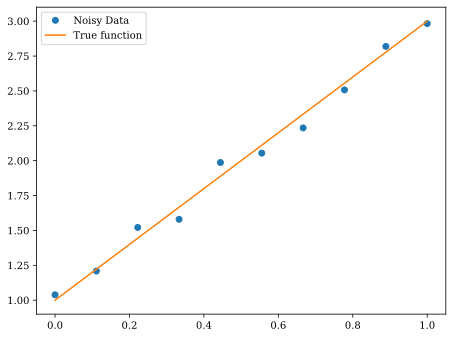

In [26]:
# Sample points
n = 10
x = np.linspace(0,1,n)

# Exact data
a = 1.0
b = 2.0
ye = a + b*x

# Add some noise
y = ye + 0.1*(2*np.random.rand(n)-1)
plt.plot(x,y,'o',label='Noisy Data')
plt.plot(x,ye,label='True function')
plt.legend();

Define the function we want to fit. The first argument is the independent variable, and remaining are the parameters that we want to find.

In [27]:
def f(x,a,b):
    return a + b*x

We can use [curve_fit](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html) function from scipy to do the fitting.

Fitted parameters =  1.0189790357576798 1.948766538749953


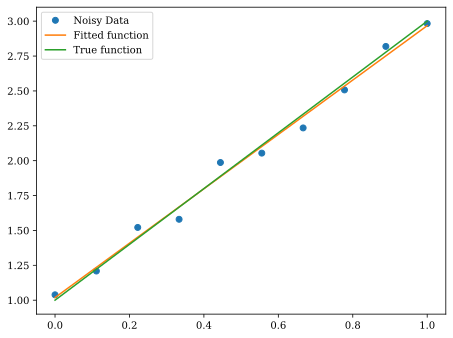

In [28]:
from scipy.optimize import curve_fit
popt, pcov = curve_fit(f, x, y)
print('Fitted parameters = ',*popt)
plt.plot(x,y,'o',label='Noisy Data')
plt.plot(x,f(x,*popt),label='Fitted function')
plt.plot(x,ye,label='True function')
plt.legend();

We can also use the [polyfit](https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html) function or [fit](https://numpy.org/doc/stable/reference/generated/numpy.polynomial.polynomial.Polynomial.fit.html#numpy.polynomial.polynomial.Polynomial.fit) function from numpy to do this. 

In [29]:
c = np.polyfit(x, y, deg=1)
print('Polynomial coefficients = ',c)

Polynomial coefficients =  [1.94876654 1.01897904]


The polynomials coefficients are returned in $c$
$$
p(x) = c[0] * x^{deg} + c[1] * x^{deg-1} + \ldots + c[-1]
$$

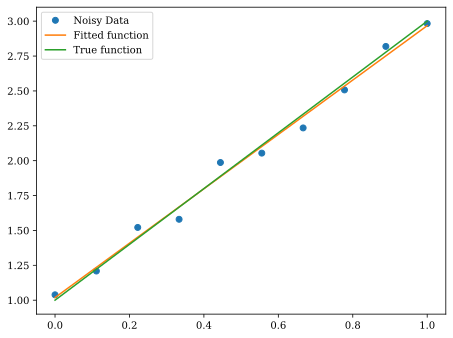

In [30]:
p = np.poly1d(c)
plt.plot(x,y,'o',label='Noisy Data')
plt.plot(x,p(x),label='Fitted function')
plt.plot(x,ye,label='True function')
plt.legend();